# A Jupyter notebook where BTC data downloaded from Binance is prepped for traning

In [106]:
# Importing relevant libraries for data management and visualization
# ta library used for technichal analysis indicators

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import pandas_ta as ta

Data was downloaded from https://www.binance.com/en/landing/data
CSV files from sept2019 to nov2020 where used as it represents an acumulating phase according to the 4 year cycle theory.
I belive that from mid 2023 untill november 2024 there will be a similar accumulation phase for BTC so I decided to train the data with this time period.

In [107]:
# specifying the path to csv files
path = "/home/martin/Downloads"
  
# list of csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty df to store content
btc_df = pd.DataFrame(columns=["date","open","high","low","close","volume","close_time","quote_volume","count","taker_buy_volume",
                         "taker_buy_quote_volume","ignore"])
 
# reading all the csv files in the specified path and appending them to the btc_df
for filename in files:
    df = pd.read_csv(filename, names=["date","open","high","low","close","volume","close_time","quote_volume","count","taker_buy_volume",
                         "taker_buy_quote_volume","ignore"])
    btc_df = pd.concat([btc_df,df])  
btc_df.sort_values(by="date", inplace=True)
btc_df.head()

/tmp/ipykernel_6220/1282923591.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  btc_df = pd.concat([btc_df,df])


,date,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1567296000000,9588.74,9608.80,9579.34,9607.85,75.066945,1567296299999,719990.082021,891,42.693944,409497.287252,0
1,1567296300000,9604.57,9615.45,9594.00,9600.55,70.945642,1567296599999,681419.492632,561,18.906562,181685.336981,0
2,1567296600000,9598.48,9615.19,9598.02,9609.30,36.108642,1567296899999,346962.304284,578,21.347931,205124.153678,0
3,1567296900000,9609.31,9625.00,9609.30,9620.00,85.606839,1567297199999,823295.804760,951,42.620899,409907.741723,0
4,1567297200000,9620.00,9623.73,9608.14,9620.23,38.321111,1567297499999,368555.022540,575,15.023955,144511.599644,0


In [108]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131373 entries, 0 to 8627
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    131373 non-null  object 
 1   open                    131373 non-null  float64
 2   high                    131373 non-null  float64
 3   low                     131373 non-null  float64
 4   close                   131373 non-null  float64
 5   volume                  131373 non-null  float64
 6   close_time              131373 non-null  object 
 7   quote_volume            131373 non-null  float64
 8   count                   131373 non-null  object 
 9   taker_buy_volume        131373 non-null  float64
 10  taker_buy_quote_volume  131373 non-null  float64
 11  ignore                  131373 non-null  object 
dtypes: float64(8), object(4)
memory usage: 13.0+ MB


131,373 data points evrey 5m where gathered.  The date is represented in UNIX time withms unit.  Irrelevant data was dropped from the DF

In [109]:
btc_df["date"] = pd.to_datetime(btc_df["date"],unit='ms')
btc_df = btc_df.set_index('date')
btc_df.drop(["close_time","quote_volume","count","taker_buy_volume","taker_buy_quote_volume","ignore"], axis=1, inplace=True)
btc_df.sort_index(inplace=True)
btc_df.head()

,open,high,low,close,volume
date,,,,,
2019-09-01 00:00:00,9588.74,9608.80,9579.34,9607.85,75.066945
2019-09-01 00:05:00,9604.57,9615.45,9594.00,9600.55,70.945642
2019-09-01 00:10:00,9598.48,9615.19,9598.02,9609.30,36.108642
2019-09-01 00:15:00,9609.31,9625.00,9609.30,9620.00,85.606839
2019-09-01 00:20:00,9620.00,9623.73,9608.14,9620.23,38.321111


To train the models pandas-ta was used to calculate returns and indicators

In [117]:
btc_df.ta.rsi(close='close', length=10, append=True)
btc_df["rsi_indicator"] = 0
btc_df["rsi_indicator"] = np.where(btc_df['RSI_10']<30, 1, 0)

btc_df["sma50"] = ta.sma(close=btc_df["close"],length=50)
btc_df["sma200"] = ta.sma(close=btc_df["close"],length=200)
btc_df["SMA_indicator"] = np.where(btc_df['sma50']>btc_df['sma200'], 1, 0)

btc_df["log_return"] = ta.log_return(close=btc_df["close"])

btc_df.dropna(inplace=True)

In [118]:
btc_df.head(50)

,open,high,low,close,volume,RSI_10,RSI_10_A_80,RSI_10_B_20,sma50,sma200,SMA_indicator,log_return,rsi_indicator
date,,,,,,,,,,,,,
2019-09-02 09:10:00,9760.59,9770.00,9757.84,9768.02,76.080118,82.777909,1,0,9746.7356,9701.77360,1,0.000557,0
2019-09-02 09:15:00,9768.03,9770.00,9760.74,9768.50,104.396462,83.051188,1,0,9746.8498,9702.74495,1,0.000049,0
2019-09-02 09:20:00,9768.91,9794.14,9768.31,9776.25,309.425778,86.806854,1,0,9747.1212,9703.75680,1,0.000793,0
2019-09-02 09:25:00,9779.07,9785.00,9758.34,9762.41,126.263333,60.295815,0,0,9747.2048,9704.72775,1,-0.001417,0
2019-09-02 09:30:00,9761.00,9762.41,9751.00,9752.19,71.228083,48.214311,0,0,9747.1498,9705.62705,1,-0.001047,0
2019-09-02 09:35:00,9751.87,9761.47,9751.00,9760.36,75.620325,56.038434,0,0,9747.2176,9706.55195,1,0.000837,0
2019-09-02 09:40:00,9759.92,9770.79,9759.34,9767.65,148.486257,61.765638,0,0,9747.4946,9707.54505,1,0.000747,0
2019-09-02 09:45:00,9767.02,9774.33,9761.48,9763.18,62.332452,56.730370,0,0,9747.6264,9708.52175,1,-0.000458,0
2019-09-02 09:50:00,9763.08,9767.64,9760.86,9764.54,44.195021,57.890858,0,0,9747.7636,9709.49475,1,0.000139,0


count    131373.000000
mean       9635.469189
std        2453.961436
min        3882.220000
25%        8093.550000
50%        9284.430000
75%       10539.800000
max       19811.100000
Name: close, dtype: float64

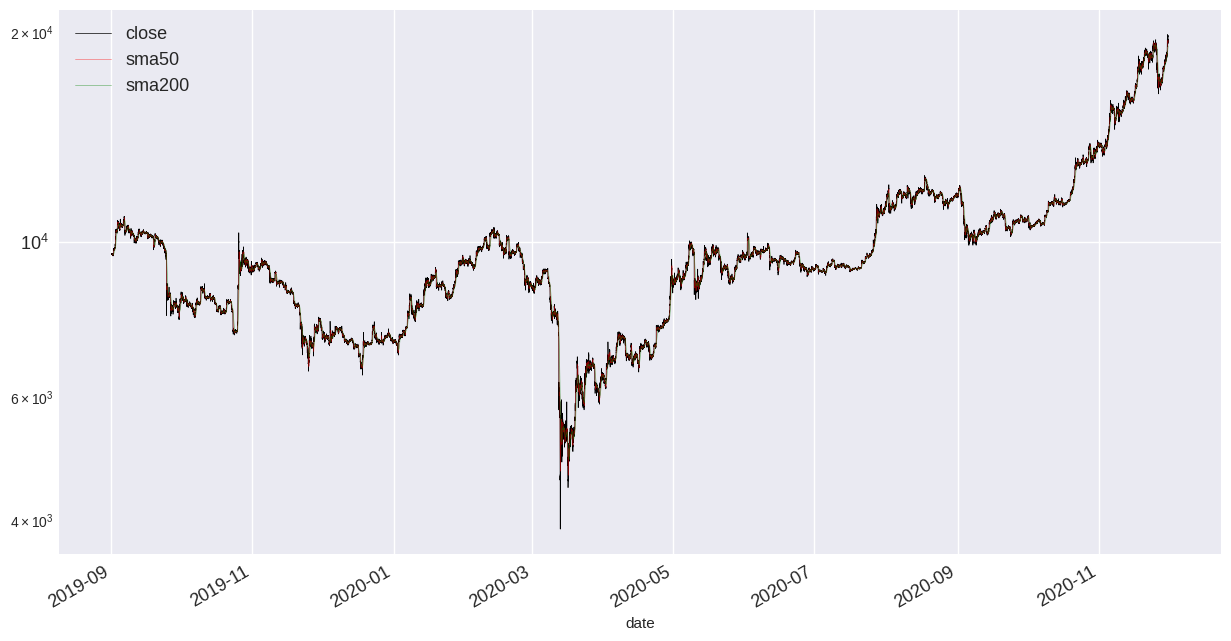

In [98]:
btc_df["close"].plot(figsize = (15, 8), fontsize = 13, linewidth=0.5, color="black")
btc_df["sma50"].plot(linewidth=0.5, alpha=0.5, color="red")
btc_df["sma200"].plot(linewidth=0.5, alpha=0.5, color="green")
plt.legend(fontsize = 13)
plt.yscale("log")
plt.show()

In [116]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Relative Strength Index (RSI)
    
    The Relative Strength Index is popular momentum oscillator used to measure the
    velocity as well as the magnitude of directional price movements.
    
    Sources:
        https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI)
    
    Calculation:
        Default Inputs:
            length=14, scalar=100, drift=1
        ABS = Absolute Value
        RMA = Rolling Moving Average
    
        diff = close.diff(drift)
        positive = diff if diff > 0 else 0
        negative = diff if diff < 0 else 0
    
        pos_avg = RMA(positive, length)
        neg_avg = ABS(RMA(negative, length))
    
        RSI = scalar * pos_avg / (pos_avg + neg_avg)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        scalar (float): How much to magnify.